In [3]:
cd /Users/prasanna/UNCC_stuff/6162-KnowledgeDiscoveryInDatabases/Project

/Users/prasanna/UNCC_stuff/6162-KnowledgeDiscoveryInDatabases/Project


In [4]:
import pandas as pd
stud_df = pd.read_csv('student-mat.csv')
print(stud_df)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health 

In [15]:
stud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     395 non-null    object 
 4   famsize     395 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    int64  
 7   Fedu        395 non-null    int64  
 8   Mjob        395 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  395 non-null    int64  
 13  studytime   395 non-null    int64  
 14  failures    395 non-null    int64  
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        395 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o

In [13]:
stud_df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,avgscore,y_binary
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,5.67,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,5.33,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,8.33,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,14.67,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,8.67,0
5,GP,M,16,U,LE3,T,4,3,services,other,...,2,1,2,5,10,15,15,15,15.00,1
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,1,1,3,0,12,12,11,11.67,1
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,1,1,6,6,5,6,5.67,0
8,GP,M,15,U,LE3,A,3,2,services,other,...,2,1,1,1,0,16,18,19,17.67,1
9,GP,M,15,U,GT3,T,3,4,other,other,...,1,1,1,5,0,14,15,15,14.67,1


#### Avgscore - New Attribute
add a new attribute avgscore taking the average of G1, G2 and G3.  We'll use this as our target for all data exploration tasks.

In [7]:
stud_df["avgscore"] = ((stud_df["G1"] + stud_df["G2"] + stud_df["G3"])/3).round(2)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

#### Checking the Distribution of the new avgscore 

<AxesSubplot:xlabel='avgscore', ylabel='Count'>

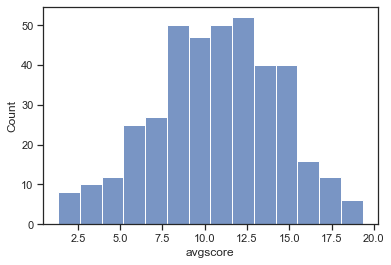

In [10]:
sns.histplot(stud_df.avgscore)

#### Binary classification attribute
Taking a Binary Classification approach, code avgscore < 10 as 0 and avgscore > 10 as 1
This attribute y_binary is only required for predictive modeling.  We dont need to use this for Data exploration purposes.

In [12]:
import numpy as np
stud_df["y_binary"] = np.array((stud_df["avgscore"] > 10) + 0)

In [14]:
stud_df.to_csv('student-mat-v1.csv', index=False)